# Plotting data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import sys, os
os.chdir("..")

# sys.path.insert(0,'..')
import src.parse as parse
from src.plot import plot_all, automatic_plotting

In [2]:
automatic_plotting("automatic_plots",smoothed=False)

X-n294-k50
X-n331-k15
X-n936-k151
X-n186-k15
X-n957-k87
X-n200-k36
X-n429-k61
X-n344-k43
X-n876-k59
X-n303-k21
X-n801-k40
X-n491-k59
X-n411-k19
X-n242-k48
X-n251-k28
X-n536-k96
X-n480-k70
X-n449-k29
X-n110-k13
X-n289-k60
X-n247-k50
X-n176-k26
X-n819-k171
X-n336-k84
X-n895-k37
X-n233-k16
X-n513-k21
X-n214-k11
X-n162-k11
X-n148-k46
X-n190-k8
X-n181-k23
X-n856-k95
X-n641-k35
X-n359-k29
X-n586-k159
X-n716-k35
X-n916-k207
X-n393-k38
X-n384-k52
X-n322-k28
X-n524-k153
X-n153-k22
X-n129-k18
X-n134-k13
X-n275-k28
X-n420-k130
X-n327-k20
X-n266-k58
X-n685-k75
X-n270-k35
X-n157-k13
X-n573-k30
X-n367-k17
X-n280-k17
X-n561-k42
X-n613-k62
X-n783-k48
X-n837-k142
X-n308-k13
X-n228-k23
X-n766-k71
X-n139-k10
X-n439-k37
X-n655-k131
X-n749-k98
X-n172-k51
X-n106-k14
X-n256-k16
X-n284-k15
X-n469-k138
X-n317-k53
X-n219-k73
X-n125-k30
X-n701-k44
X-n313-k71
X-n599-k92
X-n261-k13
X-n298-k31
X-n376-k94
X-n627-k43
X-n101-k25
X-n459-k26
X-n167-k10
X-n1001-k43
X-n670-k130
X-n115-k10
X-n209-k16
X-n143-k7
X-n401-k29
X

In [27]:

# data8['total time'] = data8['total time'].astype(float)

MAIN: Instance X-n237-k14
PARSE: There is no minimum number of trucks.
PARSE: Using the provided K = 0
PARSE: Writing to file output/X-n237-k14.log


## Plot by hand

MAIN: Instance X-n237-k14
PARSE: There is no minimum number of trucks.
PARSE: Using the provided K = 0
PARSE: Writing to file output/X-n237-k14.log


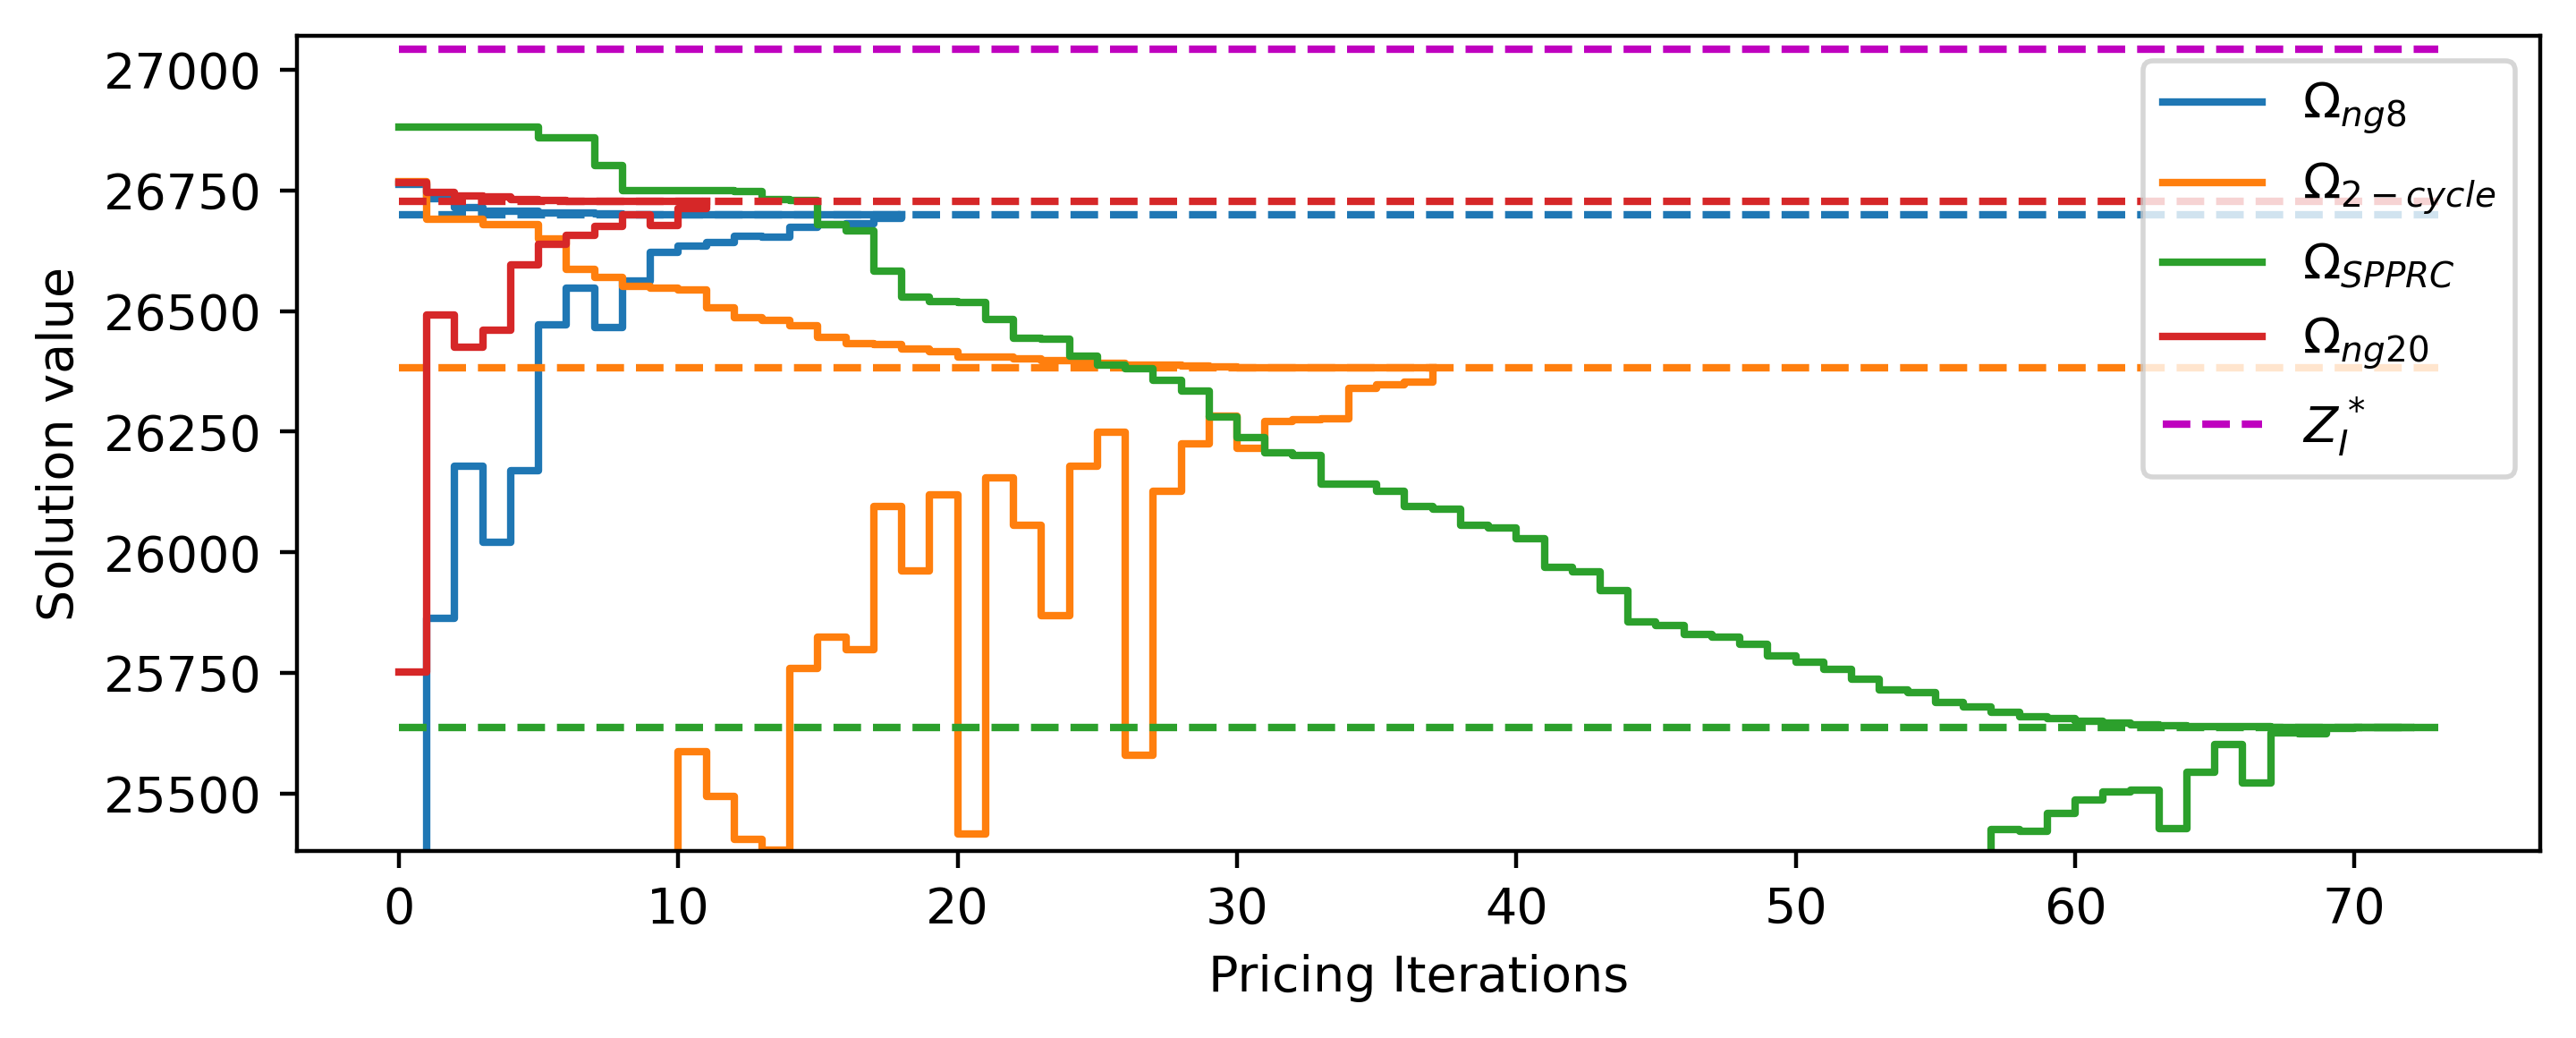

In [133]:
G = parse.parse_graph("X-n237-k14")
data8 = parse.parse_output("output_uchoa/X-n237-k14-ng8.log")
datac = parse.parse_output("output_uchoa/X-n237-k14-cyc2.log")
datas = parse.parse_output("output_uchoa/X-n237-k14-SPPRC.log")
data2 = parse.parse_output("output_uchoa/X-n237-k14-ng20.log")
dfs = [data8,datac,datas,data2]

ng20 , time, smoothed, save = True, False, False, False
plt.figure(figsize=(7.3,3),dpi=400)
color_map = {"ng20":"b","ng8":"r","cyc2":"c","SPPRC":"k"}
legend_map = {"ng20":"ng20","ng8":"ng8","cyc2":"2-cycle","SPPRC":"SPPRC"}

ymax = max((df["upper_bound"][0] for df in dfs))
ymin = min((df["upper_bound"].iloc[-1] for df in dfs))

for df in dfs:
    df['total time'] = df['total time'].cumsum()
if time:
    xmax = max((df['total time'].iloc[-1] for df in dfs if ng20 or df['method'].iloc[-1] != 'ng20'))
else:
    xmax = max((df[df['method'].isin(color_map.keys())].shape[0] for df in dfs if ng20 or df['method'].iloc[-1] != 'ng20'))
    
for data in dfs:
    method = data['method'].iloc[-1]
    if method == "ng20" and not ng20:
        continue
    init_val = data['upper_bound'][0]
    data = data[data['method'] == method]
    if time:
        x_values = list(data['total time'])
    else:
        x_values = list(range(data.shape[0]))

    if smoothed:
        lower_bounds = []
        best_lb = data['lower_bound'].iloc[0]
        for lb in data['lower_bound']:
            if lb > best_lb:
                best_lb = lb
            lower_bounds.append(best_lb)
    else:
        lower_bounds = list(data['lower_bound'])
    label_string = r"$\Omega_{" + legend_map[method] + r"}$"
    lines = plt.plot(x_values, lower_bounds, label=label_string,drawstyle='steps-post')
    color = lines[0].get_color()

    upper_bounds = list(data['upper_bound'])
    if time:
        x_values.insert(0,0)
        upper_bounds.insert(0,init_val)
    plt.plot(x_values, upper_bounds, color=color ,drawstyle='steps-post')#, label="$Z_{" + method + "}$")

    x_values.append(xmax)
    final_val = [upper_bounds[-1] for i in range(len(upper_bounds) + 1)]
    plt.plot(x_values,final_val, "--", color=color)#, label="$Z^*_{" + method + "}$")

optimal = [27042 for i in range(2)]
plt.plot([0,xmax], optimal, "--", label="$Z^*_{I}$",color="m")
    
plt.ylim((ymin*0.99,ymax*1.007))
# plt.xscale('log')
# plt.xlim((3,xmax*1.1))

plt.legend(loc='upper right')
if time:
    plt.xlabel("Pricing time in s")
else:
    plt.xlabel("Pricing Iterations")
plt.ylabel("Solution value")
plt.tight_layout()
# plt.savefig("plots/X-n237-k14.no-ng20.pgf")
# plt.savefig("plots/X-n237-k14.pgf")
plt.savefig("plots/X-n237-k14.it.pgf")

## Iterationsplot

MAIN: Instance X-n120-k6
PARSE: There is no minimum number of trucks.
PARSE: Using the provided K = 0
PARSE: Writing to file output/X-n120-k6.log
[1503.2, 3877.2, 6262.299999999999, 10108.9, 12619.8, 15057.699999999999, 17588.0, 20080.2, 23913.7, 27697.0, 29787.7, 32376.600000000002, 35024.700000000004, 37961.600000000006, 40218.600000000006, 42769.90000000001, 45095.100000000006, 47997.3, 51560.0, 55624.7, 59359.399999999994, 63289.899999999994, 66997.2, 70951.59999999999, 74778.99999999999, 78680.39999999998, 82577.89999999998, 86437.39999999998, 90278.79999999997, 94258.89999999998, 98231.09999999998]


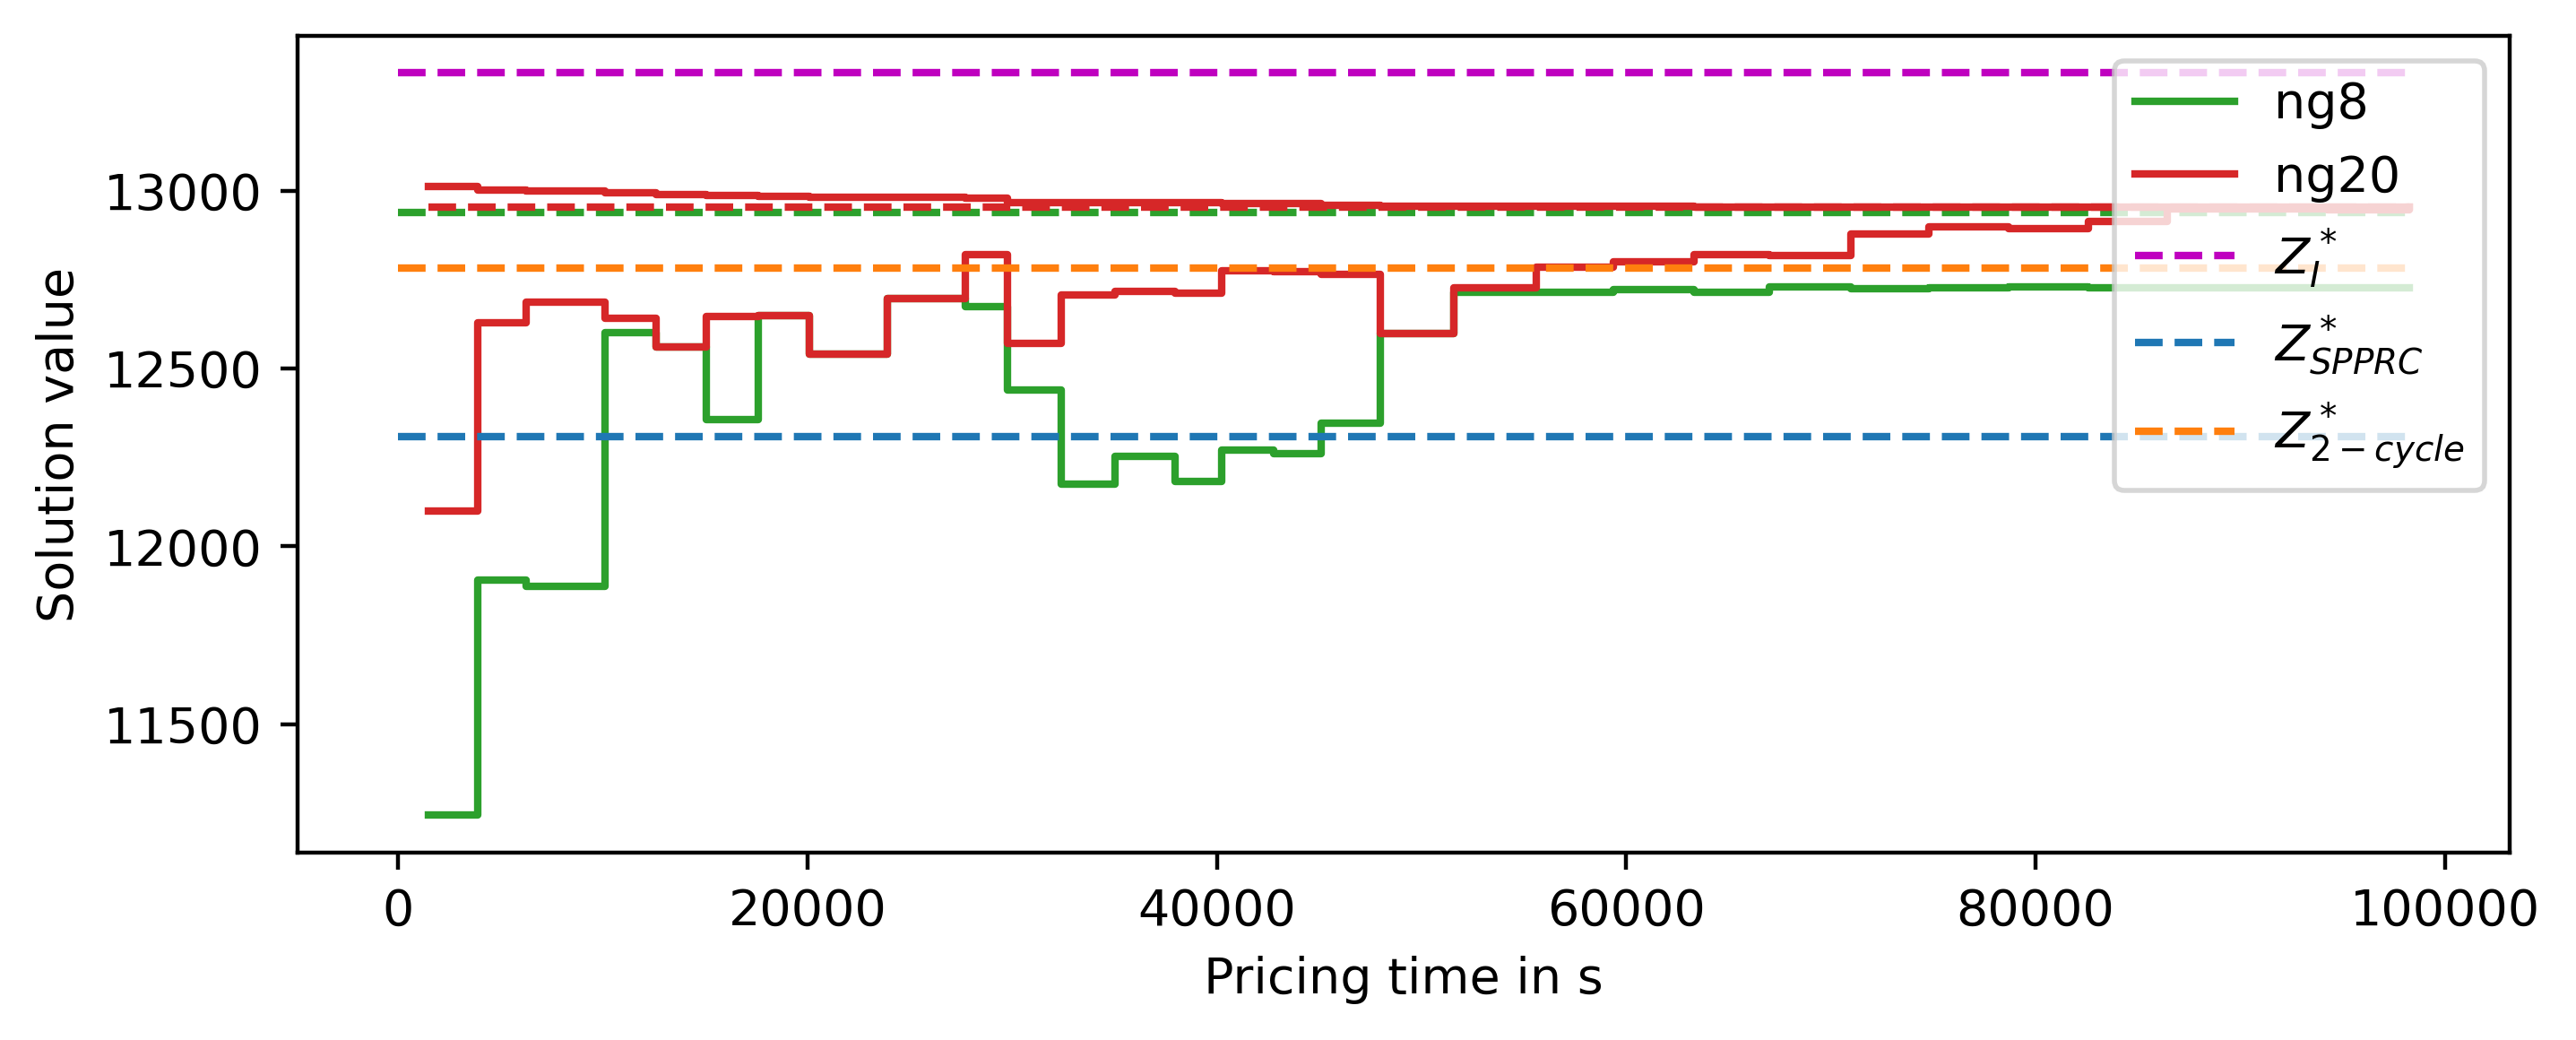

In [207]:
G = parse.parse_graph("X-n120-k6")
df = parse.parse_output("output_iterations/X-n120-k6.log")

ng20 , time, smoothed, save = True, True, False, False
plt.figure(figsize=(7.3,3),dpi=400)
color_map = {"ng20":'#d62728',"ng8":'#2ca02c',"cyc2":"#ff7f0e","SPPRC":'#1f77b4'}
legend_map = {"ng20":"ng20","ng8":"ng8","cyc2":"2-cycle","SPPRC":"SPPRC"}
optimal_map = {"ng20":"ng20","ng8":12939,"cyc2":12784,"SPPRC":12308}
legend_map = {"ng20":"ng20","ng8":"ng8"}
# display(data)

# ymax = max((df["upper_bound"][0] for df in dfs))
# ymin = min((df["upper_bound"].iloc[-1] for df in dfs))

if time:
    xmax = (df[df['method'] == "ng20"])['total time'].cumsum().iloc[-1]
# elif time :
#     xmax = (df[df['method'] == ng])['total time'].cumsum().iloc[-1]
# if time:
#     xmax = max(((df[df['method'] == method])['total time'].cumsum().iloc[-1] for method in legend_map.keys() if ng20 or df['method'].iloc[-1] != 'ng20'))
else:
    xmax = max((df[df['method'] == method].shape[0] for method in legend_map.keys() if ng20 or df['method'].iloc[-1] != 'ng20'))

if time:
    x_values = list((df[df['method'] == "ng20"])['total time'].cumsum())
else:
    x_values = list(range(data[data.method == "ng20"].shape[0]))
print(x_values)
    
for method in list(legend_map.keys())[::-1]:
#     method = data['method'].iloc[-1]
#     if method == "ng20" and not ng20:
#         continue
    init_val = df['upper_bound'][0]
    data = df[df['method'] == method].copy()

    if smoothed:
        lower_bounds = []
        best_lb = data['lower_bound'].iloc[0]
        for lb in data['lower_bound']:
            if lb > best_lb:
                best_lb = lb
            lower_bounds.append(best_lb)
    else:
        lower_bounds = list(data['lower_bound'])

#     label_string = r"$\Omega_{" + legend_map[method] + r"}$"
    label_string = legend_map[method]
    lines = plt.plot(x_values, lower_bounds, label=label_string,drawstyle='steps-post',color=color_map[method])
    color = lines[0].get_color()

    if method == "ng20":
        upper_bounds = list(data['upper_bound'])
#     if time:
#         x_values.insert(0,0)
#         upper_bounds.insert(0,init_val)
        plt.plot(x_values, upper_bounds, color=color ,drawstyle='steps-post')#, label="$Z_{" + method + "}$")

#     x_values.append(xmax)
        final_val = [upper_bounds[-1] for i in range(len(upper_bounds))]
        plt.plot(x_values,final_val, "--", color=color)#, label="$Z^*_{" + method + "}$")
    else:
        optimal = [optimal_map[method] for i in range(2)]
        plt.plot([0,xmax], optimal, "--", color=color)

optimal = [13332 for i in range(2)]
plt.plot([0,xmax], optimal, "--", label="$Z^*_{I}$",color="m")

optimal = [optimal_map["SPPRC"] for i in range(2)]
plt.plot([0,xmax], optimal, "--", label="$Z^*_{SPPRC}$",color=color_map["SPPRC"])

optimal = [optimal_map["cyc2"] for i in range(2)]
plt.plot([0,xmax], optimal, "--", label="$Z^*_{2-cycle}$",color=color_map["cyc2"])

# T = nx.minimum_spanning_tree(G)
# K = G.graph['min_trucks']
# lowest_remaining_edge_weights = [weight for u,v,weight in G.edges().data('weight') if not T.has_edge(u,v)]
# mst = T.size(weight='weight') + sum(sorted(lowest_remaining_edge_weights)[:K])
# mst = [mst for i in range(len(x_values))]
# plt.plot(x_values,mst,"y--",label="MST Bound")
    
# plt.ylim((ymin*0.99,ymax*1.007))
# plt.xscale('log')
# plt.xlim((3,xmax*1.1))

plt.legend(loc='upper right')
if time:
    plt.xlabel("Pricing time in s")
else:
    plt.xlabel("Pricing Iterations")
plt.ylabel("Solution value")
plt.tight_layout()
plt.savefig("plots/X-n120-k6.it.pgf")

In [3]:
color_map = {"ng20":"b","ng8":"r","cyc2":"c","SPPRC":"k"}

color_map.keys()
data[data['method'].isin(color_map.keys())]

NameError: name 'data' is not defined

In [8]:
plot_all([data,data_cyc2,data_spprc],time=True)

KeyError: 'upper_bound'

<Figure size 1460x800 with 0 Axes>

## Values for the figsize
This value is nice looking for the standard latex layout: plt.figure(figsize=(6.6,4),dpi=100)

This value is nice looking for the CoAn layout: plt.figure(figsize=(7.3,4),dpi=200)

This value is the original value for the presentation but looks horrible: plt.figure(figsize=(4.5,2.5),dpi=200)

In [3]:
plt.figure(figsize=(7.3,4),dpi=200)
x_values = data2['total time'].copy().cumsum()
# x_values = list(range(data.shape[0]))

upper_bounds = data['upper_bound']
plt.plot(x_values, upper_bounds, label="$Z_{\mathit{RMP}}$")

lower_bounds = data['lower_bound']
lower_bounds = []
best_lb = data['lower_bound'][0]
for lb in data['lower_bound']:
    if lb > best_lb:
        best_lb = lb
    lower_bounds.append(best_lb)
method = data['method'][0]
plt.plot(x_values, lower_bounds, label=f'{method} LB')

optimal = [13332 for i in range(len(upper_bounds))]
plt.plot(x_values, optimal, "--", label="$Z_{CVRP}$")

spprc = [12308 for i in range(len(upper_bounds))]
plt.plot(x_values,spprc, "--", label="$Z_{\mathit{SPPRC}}$")

# ng8 = [481 for i in range(len(upper_bounds))]
# plt.plot(ng8, label="Optimal value of ng 8.")

# if pricer.data['farley']:
#     farley_bounds = pricer.data['farley_bound']
#     plt.plot(x_values, farley_bounds, label="Farley Bound")

solval = upper_bounds.iloc[-1]
sol = [solval for i in range(len(upper_bounds))]
plt.plot(x_values, sol, "--",label="$Z_{MP}$")

# cyc2 = [12784 for i in range(len(upper_bounds))]
# plt.plot(x_values,cyc2, "--", label="$Z_{\mathit{2-cycle}}$")

# T = nx.minimum_spanning_tree(G)
# K = G.graph['min_trucks']
# lowest_remaining_edge_weights = [weight for u,v,weight in G.edges().data('weight') if not T.has_edge(u,v)]
# mst = T.size(weight='weight') + sum(sorted(lowest_remaining_edge_weights)[:K])
# mst = [mst for i in range(len(upper_bounds))]
# plt.plot(x_values, mst, "--", label="MST Bound")

# x_spprc = data_spprc['total time'].copy().cumsum()
# plt.plot(x_spprc, data_spprc['lower_bound'], label="SPPRC LB")

x_cyc2 = data_cyc2['total time'].copy().cumsum()
plt.plot(x_cyc2, data_cyc2['lower_bound'], label="Cyc2 LB")

plt.ylim((spprc[0]*0.99,optimal[0]*1.01))

plt.legend(loc='lower right')
plt.xlabel("Pricing time in s")
plt.ylabel("Solution value")
# plt.savefig("plots/X-n120-k6.zoomed-combined.pgf")
plt.show()

NameError: name 'data' is not defined

<Figure size 1460x800 with 0 Axes>